In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [ ]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
dataset.loc[:122,'Region']=0
dataset.loc[122:,'Region']=1
df=dataset

In [ ]:
df.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [ ]:
df.dropna(inplace=True)
df.reset_index()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [ ]:
df[df.isnull().any(axis=1)].index.tolist()

[]

In [ ]:
df.iloc[[121]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0


In [ ]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
df.columns=df.columns.str.strip()

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.6+ KB


In [ ]:
df['month'].unique()

array(['06', '07', '08', '09', 'month'], dtype=object)

In [ ]:
df.drop(df.loc[df['month']=='month'].index,inplace=True)

In [ ]:
df['month'].unique()

array(['06', '07', '08', '09'], dtype=object)

In [ ]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    object 
 7   FFMC         242 non-null    object 
 8   DMC          242 non-null    object 
 9   DC           242 non-null    object 
 10  ISI          242 non-null    object 
 11  BUI          242 non-null    object 
 12  FWI          242 non-null    object 
 13  Classes      242 non-null    object 
 14  Region       242 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 30.2+ KB


In [ ]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [ ]:
df['Classes']=df['Classes']=df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [ ]:
df['Region']=df['Region'].astype(int)

In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.822314,7.508264,2012.0,32.165289,62.061983,15.483471,0.766116,77.892562,14.727273,49.603719,4.756612,16.745455,7.062397,0.500000
std,8.809501,1.112888,0.0,3.629860,14.855329,2.812564,2.006754,14.358005,12.397360,47.688015,4.156909,14.232078,7.444045,0.501036
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,72.375000,5.800000,14.325000,1.400000,6.025000,0.725000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.250000,3.500000,12.450000,4.450000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.750000,17.000000,0.500000,88.300000,20.850000,70.050000,7.275000,22.775000,11.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [ ]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)
df.to_csv('Algerian_forest_fires_cleaned_dataset45.csv',index=False)

In [ ]:
dfr=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
dfr.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
3,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
4,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0


In [ ]:
dfr['Classes']=np.where(dfr['Classes']=='not fire',0,1)

In [ ]:
dfr.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
3,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
4,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0


In [ ]:
dfr.drop(['day','month','year'],axis=1,inplace=True)

In [ ]:
dfr.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
1,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
2,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
3,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
4,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0


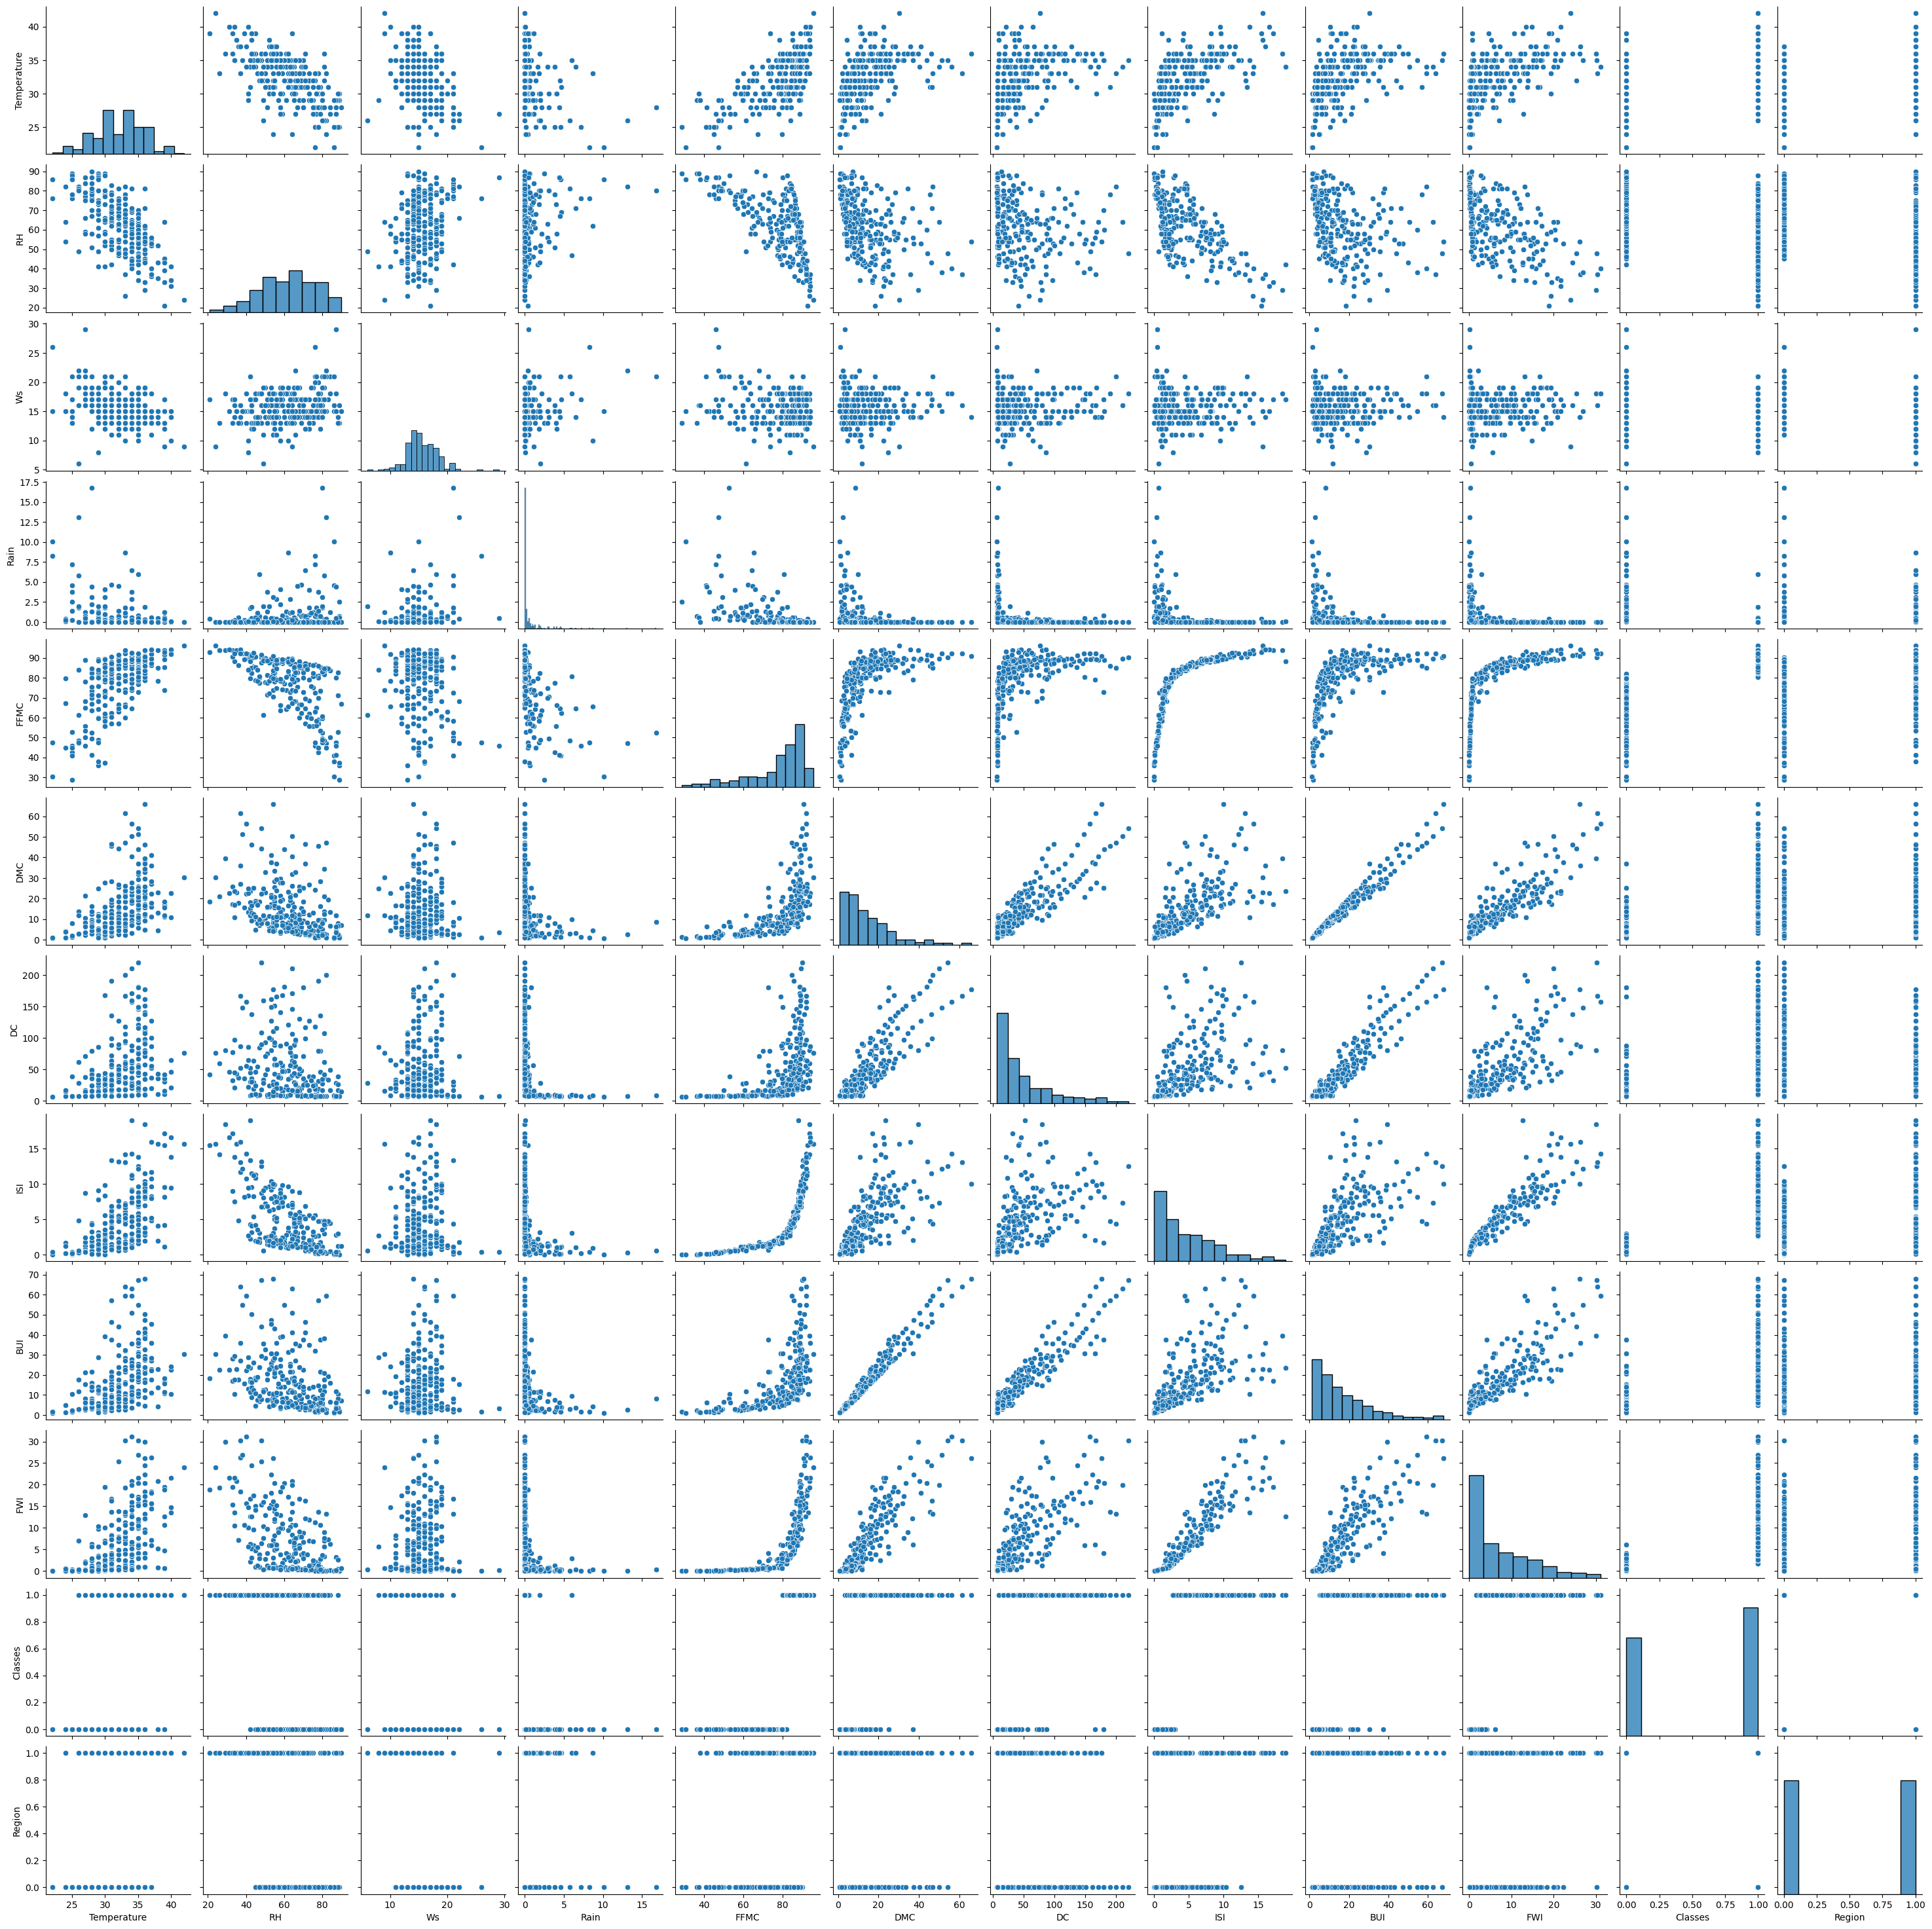

In [ ]:
sns.pairplot(dfr)

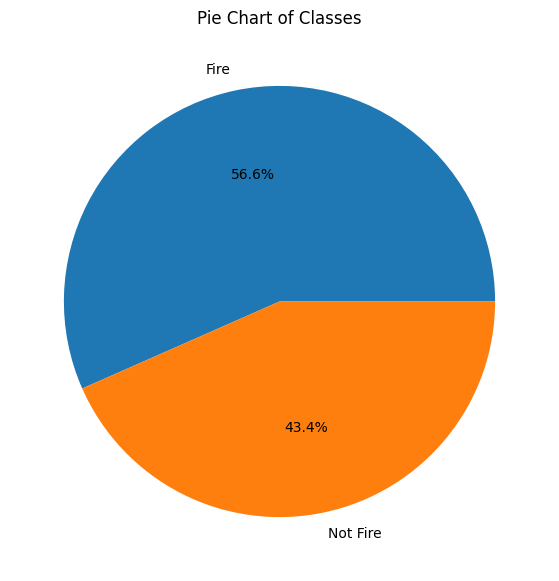

In [ ]:
percentage=dfr['Classes'].value_counts(normalize=True)*100
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie Chart of Classes')
plt.show()

In [ ]:
dfr.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.653807,-0.282203,-0.328479,0.675579,0.483995,0.374304,0.602686,0.457968,0.565293,0.514104,0.266938
RH,-0.653807,1.000000,0.245770,0.221939,-0.647184,-0.410608,-0.228599,-0.688983,-0.355888,-0.583270,-0.435028,-0.405011
Ws,-0.282203,0.245770,1.000000,0.173253,-0.163932,0.002655,0.082649,0.011632,0.035015,0.035733,-0.066053,-0.178142
Rain,-0.328479,0.221939,0.173253,1.000000,-0.546220,-0.290799,-0.299980,-0.349397,-0.301966,-0.326431,-0.382026,-0.041681
FFMC,0.675579,-0.647184,-0.163932,-0.546220,1.000000,0.602342,0.505875,0.739249,0.590678,0.690178,0.768704,0.219527
DMC,0.483995,-0.410608,0.002655,-0.290799,0.602342,1.000000,0.875514,0.679461,0.982187,0.875453,0.583936,0.189048
DC,0.374304,-0.228599,0.082649,-0.299980,0.505875,0.875514,1.000000,0.507159,0.941797,0.738685,0.509166,-0.082654
ISI,0.602686,-0.688983,0.011632,-0.349397,0.739249,0.679461,0.507159,1.000000,0.642961,0.922666,0.734304,0.260686
BUI,0.457968,-0.355888,0.035015,-0.301966,0.590678,0.982187,0.941797,0.642961,1.000000,0.857494,0.584863,0.085888
FWI,0.565293,-0.583270,0.035733,-0.326431,0.690178,0.875453,0.738685,0.922666,0.857494,1.000000,0.718149,0.194189


<Axes: >

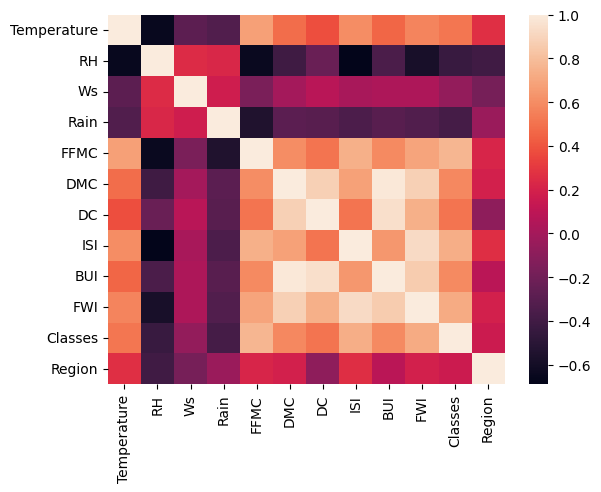

In [ ]:
sns.heatmap(dfr.corr())

<Axes: ylabel='FWI'>

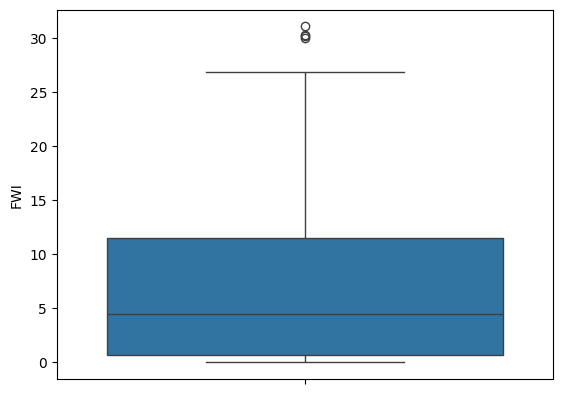

In [ ]:
sns.boxplot(dfr['FWI'])

In [ ]:
dfr.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
1,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
2,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
3,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
4,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0


In [ ]:
X=dfr.drop('FWI',axis=1)
y=dfr['FWI']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.25,random_state=42)

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658677,-0.458308,-0.430497,0.703071,0.586597,0.442419,0.647696,0.547225,0.645768,0.292656
RH,-0.658677,1.000000,0.234408,0.334923,-0.718009,-0.389294,-0.240032,-0.777044,-0.342027,-0.523173,-0.365885
Ws,-0.458308,0.234408,1.000000,0.316089,-0.194096,-0.031362,0.054619,-0.049840,0.003691,-0.067501,-0.158368
Rain,-0.430497,0.334923,0.316089,1.000000,-0.625550,-0.318620,-0.321616,-0.364490,-0.326687,-0.386597,-0.156689
FFMC,0.703071,-0.718009,-0.194096,-0.625550,1.000000,0.609242,0.541283,0.736870,0.598939,0.737226,0.205248
DMC,0.586597,-0.389294,-0.031362,-0.318620,0.609242,1.000000,0.898952,0.682823,0.986043,0.663690,0.180296
DC,0.442419,-0.240032,0.054619,-0.321616,0.541283,0.898952,1.000000,0.541127,0.957965,0.600839,-0.091297
ISI,0.647696,-0.777044,-0.049840,-0.364490,0.736870,0.682823,0.541127,1.000000,0.645036,0.754107,0.294453
BUI,0.547225,-0.342027,0.003691,-0.326687,0.598939,0.986043,0.957965,0.645036,1.000000,0.656168,0.080808
Classes,0.645768,-0.523173,-0.067501,-0.386597,0.737226,0.663690,0.600839,0.754107,0.656168,1.000000,0.196429


<Axes: >

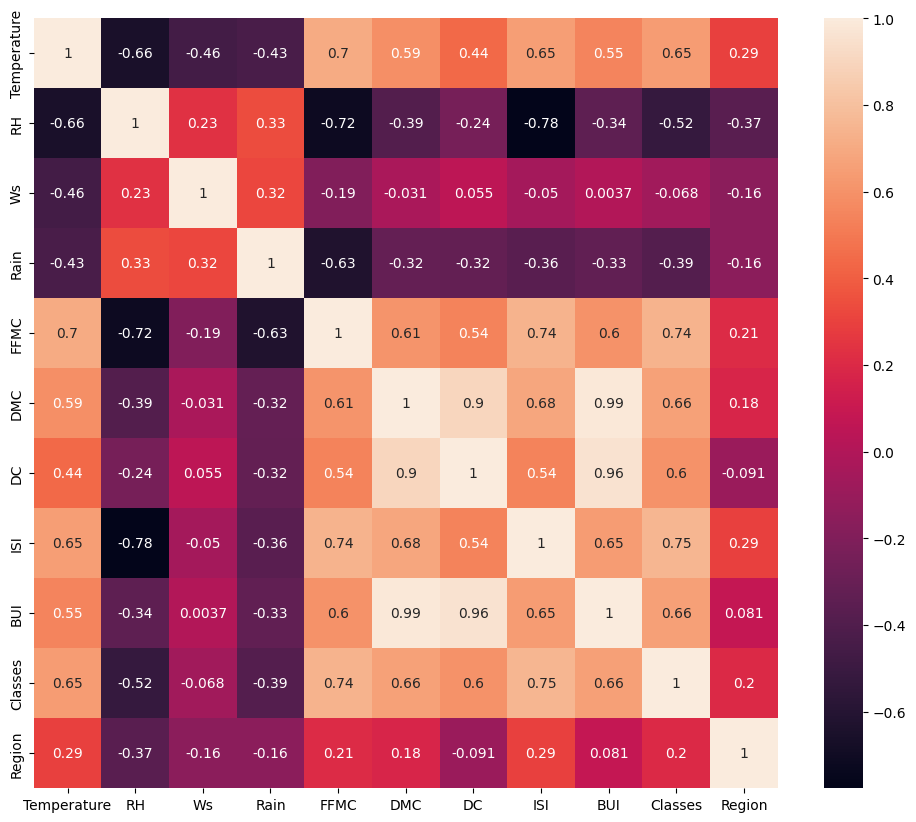

In [ ]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [ ]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features=correlation(X_train,0.85)

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

0.698331541778294
0.96334507091936


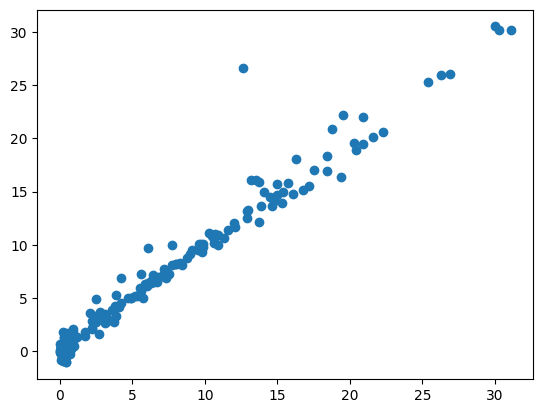

In [ ]:
#Linear Regression
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
ypred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,ypred)
score=r2_score(y_test,ypred)
print(mae)
print(score)
plt.scatter(y_test,ypred)

1.1996538863658632
0.9443524714555938


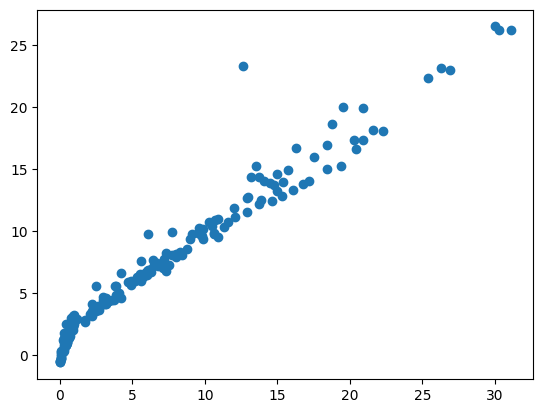

In [ ]:
#Lasso Regression
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
ypred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,ypred)
score=r2_score(y_test,ypred)
print(mae)
print(score)
plt.scatter(y_test,ypred)

0.7456339334323318
0.9641013347497703


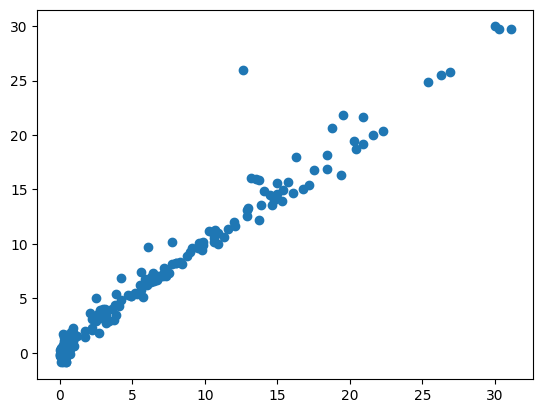

In [ ]:
#Lasso Regression
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
ypred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,ypred)
score=r2_score(y_test,ypred)
print(mae)
print(score)
plt.scatter(y_test,ypred)

1.8979595967134377
0.8802089663990037


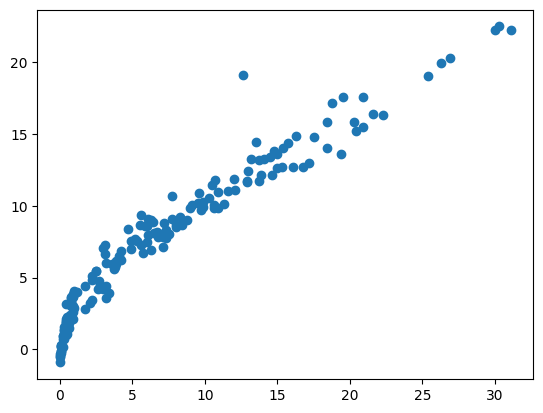

In [ ]:
#ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
ypred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,ypred)
score=r2_score(y_test,ypred)
plt.scatter(y_test,ypred)
print(mae)
print(score)